Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 82ms/step - accuracy: 0.3313 - loss: 1.8019 - val_accuracy: 0.5352 - val_loss: 1.2975
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 80ms/step - accuracy: 0.5447 - loss: 1.2648 - val_accuracy: 0.5622 - val_loss: 1.2476
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.6017 - loss: 1.1212 - val_accuracy: 0.6364 - val_loss: 1.0257
313/313 - 3s - 11ms/step - accuracy: 0.6364 - loss: 1.0257
Test accuracy: 0.64
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


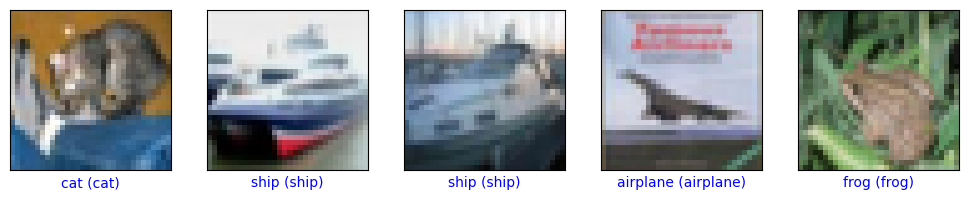

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize image data to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=3,
          validation_data=(x_test, y_test),
          batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Predict on test images and show some
predictions = model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label[0]]})", color=color)

# Display a few predictions
num_images = 5
plt.figure(figsize=(10, 2))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plot_image(i, predictions[i], y_test[i], x_test[i])
plt.tight_layout()
plt.show()
